## Load Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("..")

import numpy as np
from importlib import reload 
import networkx as nx 
from tqdm import tqdm 

import torch
import torch_geometric as geonn
from torch_geometric.loader import DataListLoader, DataLoader

from utilities import reader
import vis

import test as tst

from importlib import reload

Random seed set as 1234
Random seed set as 1234


## Load GPU and test dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Running on {}. GPU model : {}".format(device, torch.cuda.get_device_name(0)))

path_dataset = "../../dataset/dConstant"

dataset_test = reader.BuildDataset(root = path_dataset, mode = 'test', precision = torch.float)
loader_test = DataListLoader(dataset_test,  batch_size = 50, shuffle = False, num_workers = 0)
print("Number of samples in the test dataset : ", len(dataset_test))

Running on cuda. GPU model : Quadro T2000 with Max-Q Design
Number of samples in the test dataset :  2000


Run the following cell to compute the average diameter of the samples in the test dataset

In [3]:
# distance = []
# for k in tqdm(range(len(dataset_test))):

#     data = dataset_test[k]
#     dictpos = {}
#     for i in range(len(data.pos)):
#         dictpos[i] = np.asarray([data.pos[i,0].item(), data.pos[i,1].item()])
    
#     net_data = geonn.utils.to_networkx(data, to_undirected = False, remove_self_loops=False)
#     G = net_data.to_undirected()
#     G.remove_edges_from(nx.selfloop_edges(G))
#     G.remove_nodes_from(list(nx.isolates(G)))
#     d = nx.distance_measures.diameter(G)
#     distance.append(d)
#     dictpos.clear()
    
# print("Mean geodesic distance : ", np.mean(distance))
# print("Max geodesic distance : ", np.max(distance))
# print("Min geodesic distance : ", np.min(distance))

In [4]:
ckpt_original_no_gamma = torch.load("../results/original_no_gamma/ckpt/running_model.pt")
ckpt_original_with_gamma = torch.load("../results/original_with_gamma/ckpt/running_model.pt")
ckpt_large_iteration = torch.load("../results/large_iteration_no_gamma/ckpt/running_model.pt")

list_running_train_model = [ckpt_original_no_gamma["hist_train"], ckpt_original_with_gamma["hist_train"], ckpt_large_iteration["hist_train"]]
list_running_val_model = [ckpt_original_no_gamma["hist_val"], ckpt_original_with_gamma["hist_val"], ckpt_large_iteration["hist_val"]]
list_running_names = ["No Gamma", "With Gamma", "Large It"]

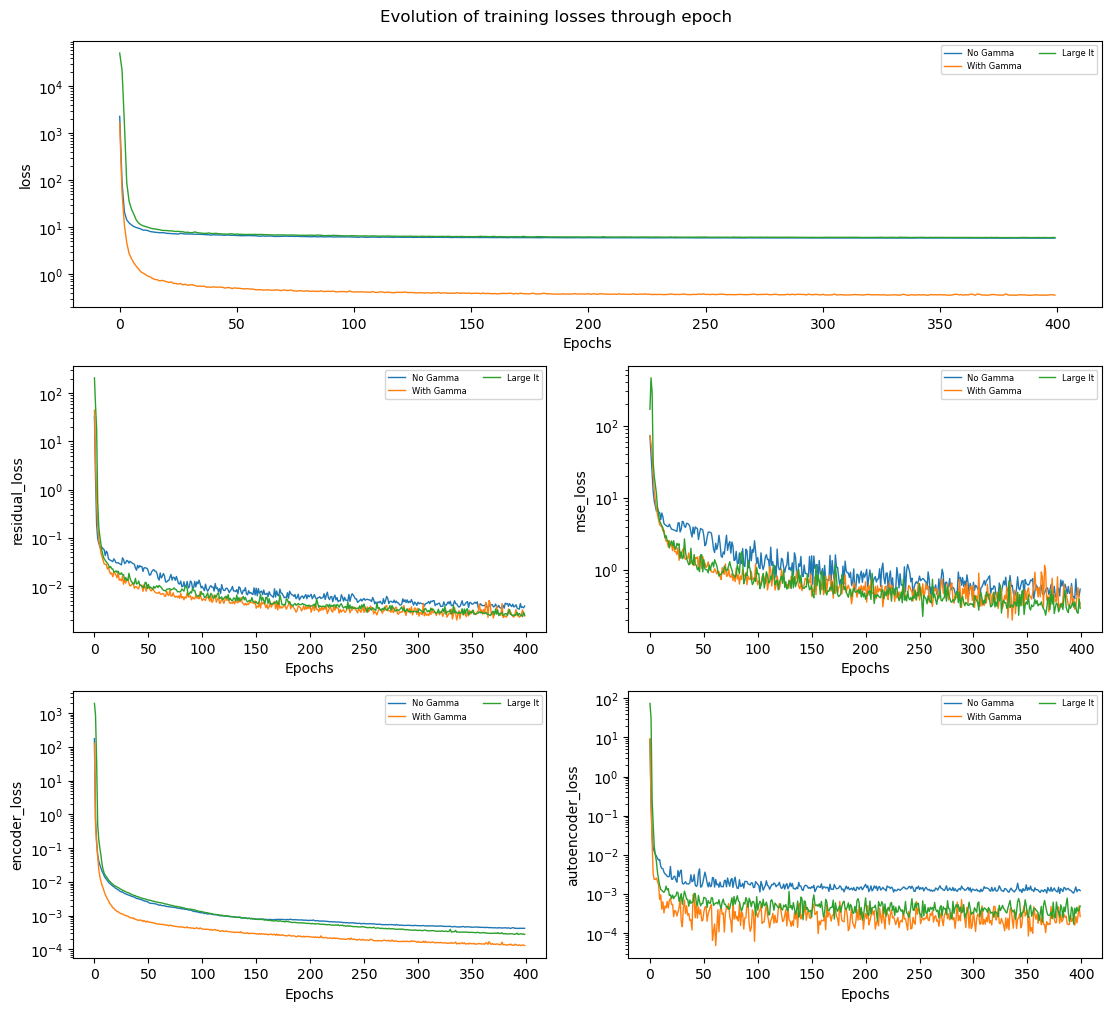

In [6]:
reload(vis)
vis.visualize_losses(list_running_train_model, list_running_names)

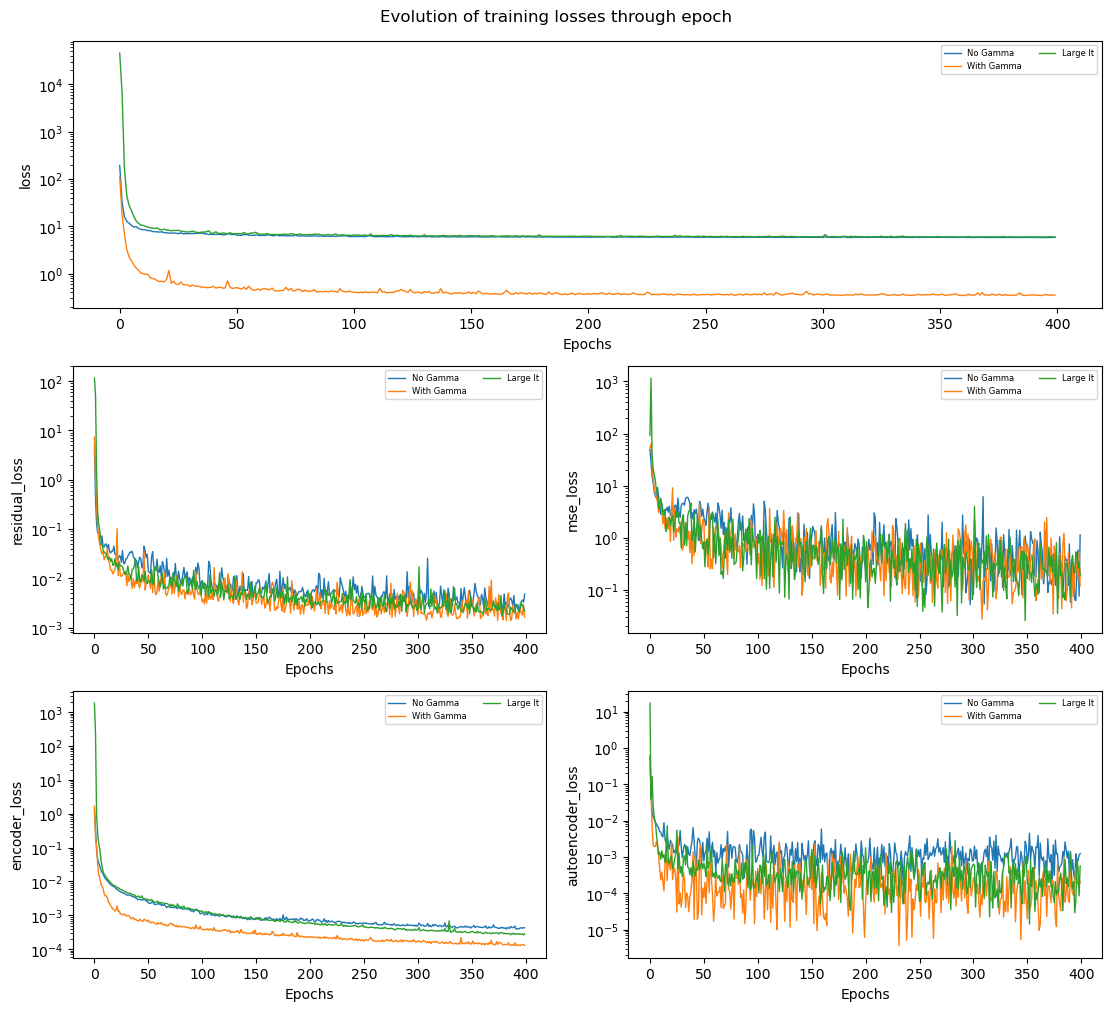

In [6]:
reload(vis)
vis.visualize_losses(list_running_val_model, list_running_names)

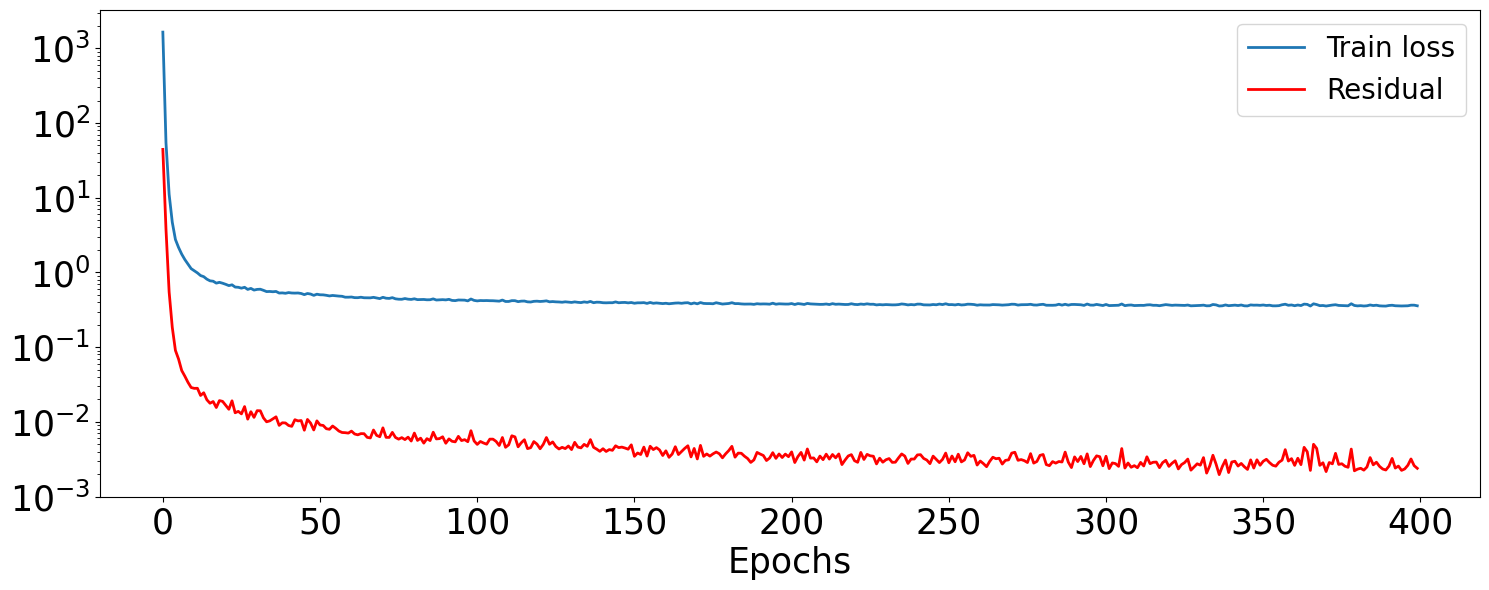

In [16]:
reload(vis)

vis.losses_on_same_plot(ckpt_original_with_gamma["hist_train"], "img/")

In [4]:
ckpt_best_original_no_gamma = torch.load("../results/original_no_gamma/ckpt/best_model.pt")
ckpt_best_original_with_gamma = torch.load("../results/original_with_gamma/ckpt/best_model.pt")
ckpt_best_large_iteration = torch.load("../results/large_iteration_no_gamma/ckpt/best_model.pt")

list_best_model = [ckpt_best_original_no_gamma, ckpt_best_original_with_gamma, ckpt_best_large_iteration]
list_names = ["No Gamma", "With Gamma", "Large It"]

### Test on the full dataset

In [19]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  No Gamma
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:07<00:00,  5.69it/s]


std Res :  0.00040748285777853735
std MSE :  0.03045791888536257
std Dirichlet :  0.00014902646111486365
┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ No Gamma │  1.953e-03 │ 6.583e-02 │      4.810e-04 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  With Gamma
Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


100%|██████████| 40/40 [00:07<00:00,  5.69it/s]


std Res :  0.00016274434091962113
std MSE :  0.024893215574366915
std Dirichlet :  1.7807141572255378e-05
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name       │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ With Gamma │  1.324e-03 │ 6.375e-02 │      1.210e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  Large It
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}


100%|██████████| 40/40 [00:16<00:00,  2.44it/s]

std Res :  0.00019796711335903398
std MSE :  0.010453645296079577
std Dirichlet :  9.969550931588064e-06
┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ Large It │  1.618e-03 │ 3.489e-02 │      1.277e-04 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


In [58]:
import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

Random sample :  665
Data(x=[463, 1], edge_index=[2, 2826], edge_attr=[2826, 3], y=[463, 1], pos=[463, 2], a_ij=[2826, 1], sol=[463, 1], prb_data=[463, 2], tags=[463, 1])


Default config :  {'latent_dim': 10, 'k': 30, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        463 │  1.138e-03 │ 1.525e-02 │      3.470e-05 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


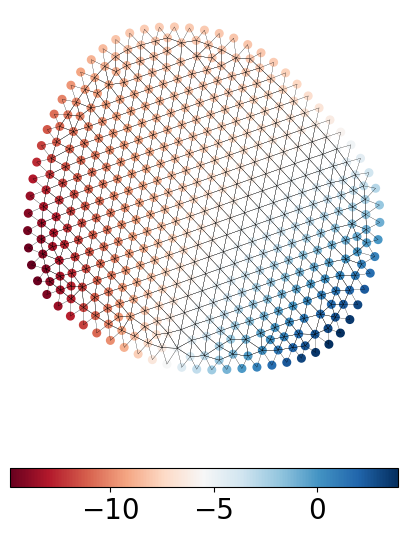

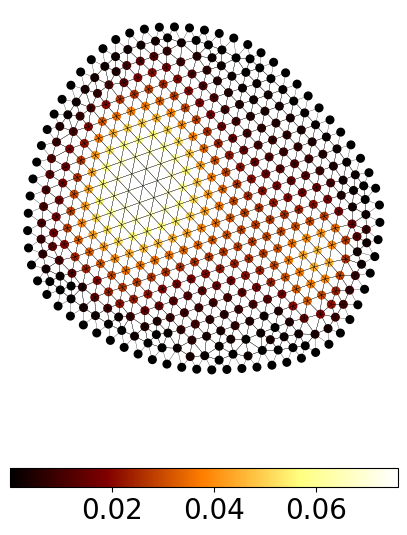

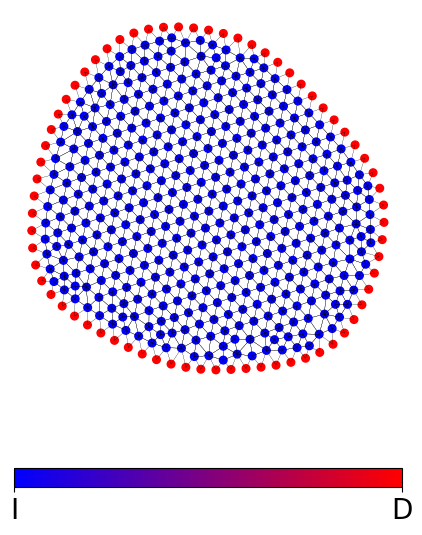

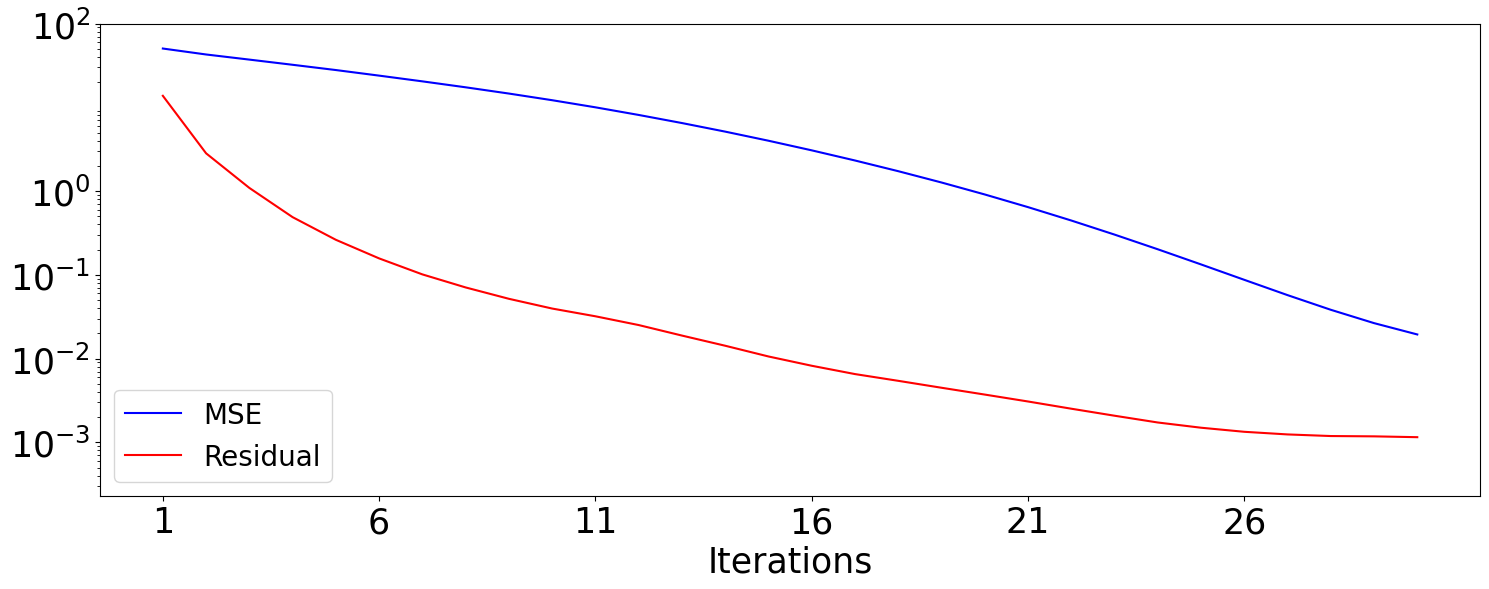

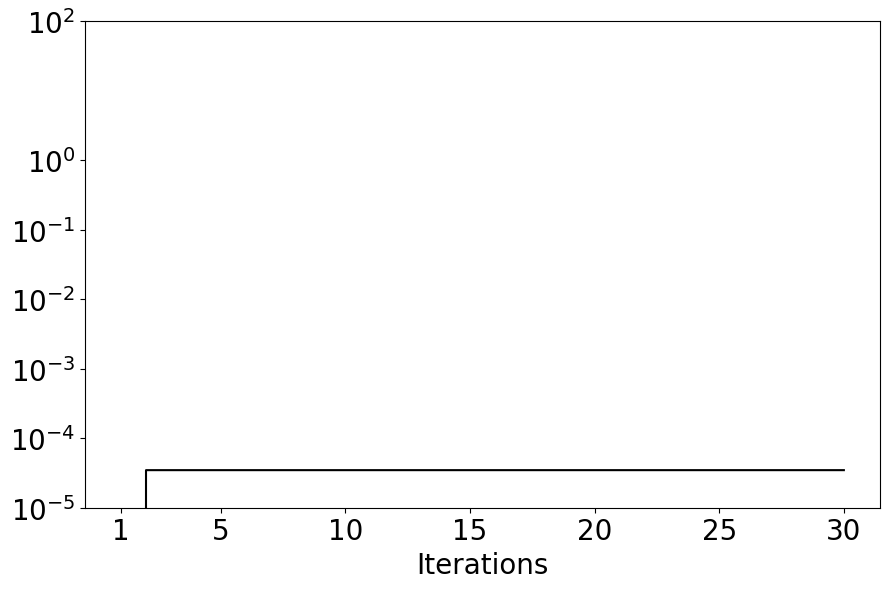

In [59]:
reload(vis)
reload(tst)
# Number 665
tst.solution_sample(ckpt_best_original_with_gamma, data, device)

In [16]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Random seed set as 1234
Evaluation model :  No Gamma
Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}


100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


std Res :  84.03264621221756
std MSE :  52.81703174093492
std Dirichlet :  0.00014902646111486365
┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ No Gamma │  5.743e+01 │ 3.715e+01 │      4.810e-04 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  With Gamma
Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


std Res :  0.004736915594710261
std MSE :  0.028755617434483953
std Dirichlet :  1.7807141572255378e-05
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name       │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ With Gamma │  4.839e-03 │ 9.600e-02 │      1.210e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
Evaluation model :  Large It
Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]

std Res :  0.00027930331772677507
std MSE :  0.03387951275521915
std Dirichlet :  9.969550931588064e-06
┍━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name     │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ Large It │  2.536e-03 │ 1.426e-01 │      1.277e-04 │
┕━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


Random seed set as 1234
Random sample :  1889
Data(x=[458, 1], edge_index=[2, 2792], edge_attr=[2792, 3], y=[458, 1], pos=[458, 2], a_ij=[2792, 1], sol=[458, 1], prb_data=[458, 2], tags=[458, 1])
Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/05_09_2023_15:40:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  2.885e-03 │ 4.268e-02 │      1.875e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


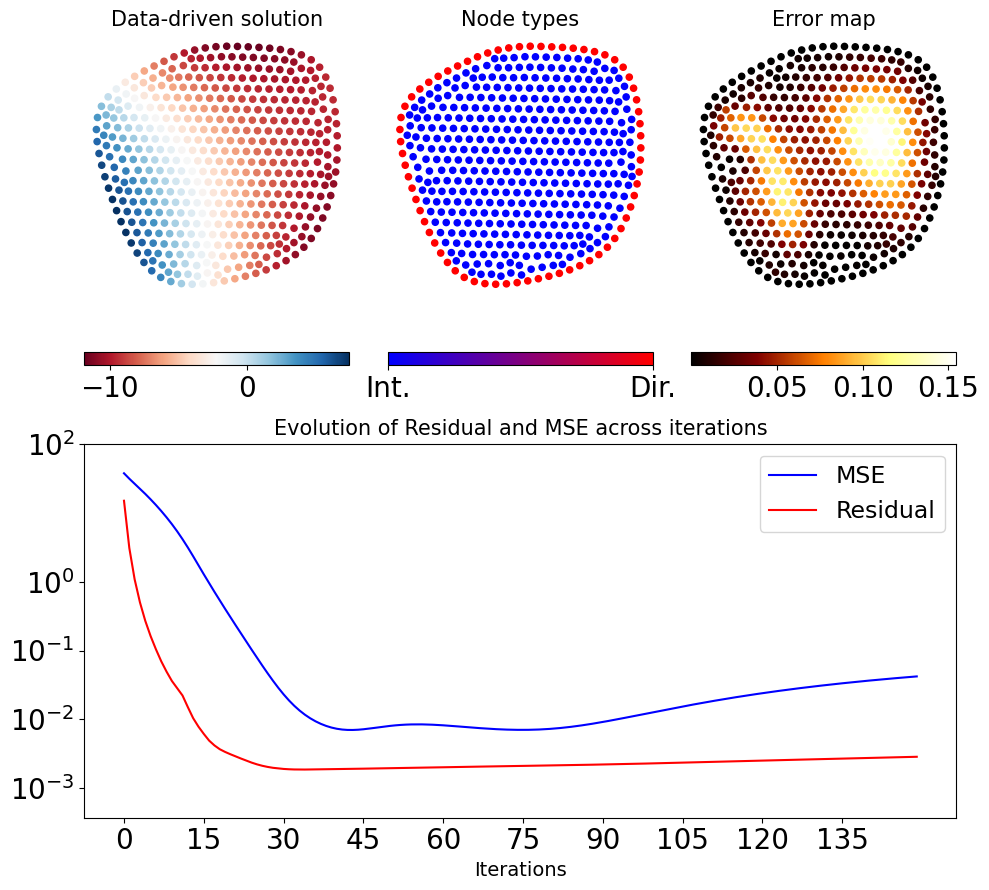

Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  1.060e-02 │ 5.203e-02 │      1.834e-04 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


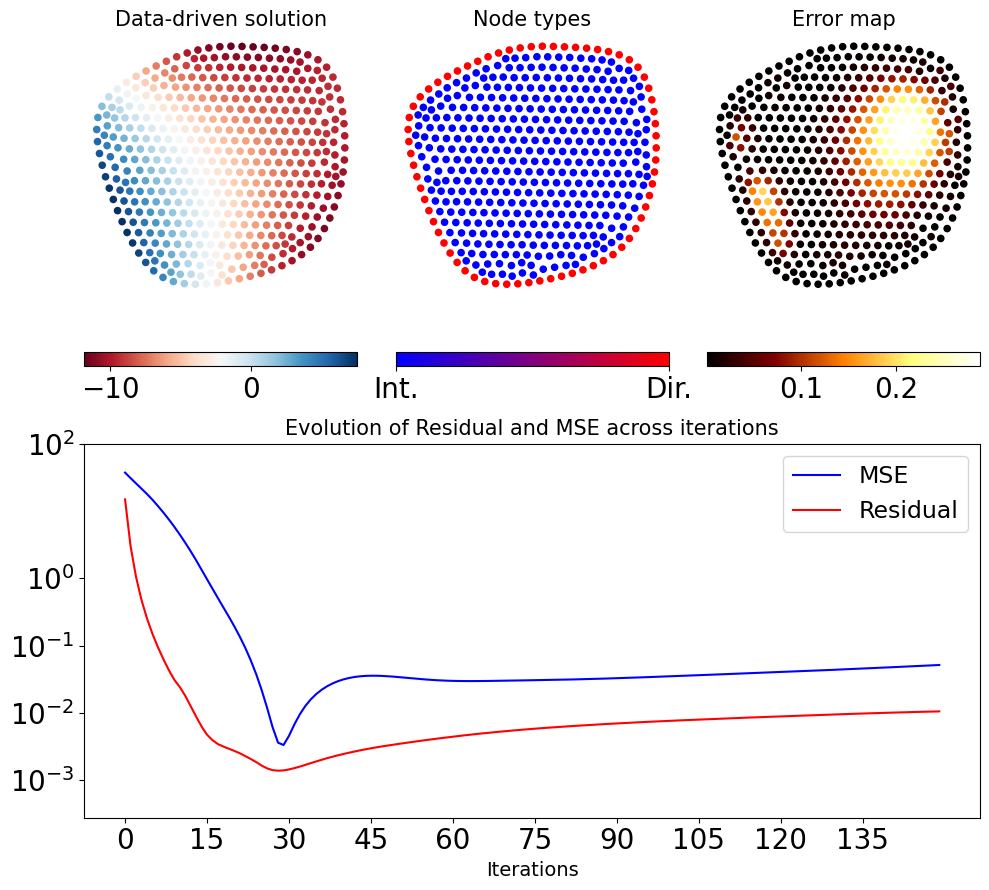

Default config :  {'latent_dim': 10, 'k': 150, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}
┍━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│   Nb nodes │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│        458 │  1.719e-03 │ 1.030e-02 │      5.858e-05 │
┕━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙


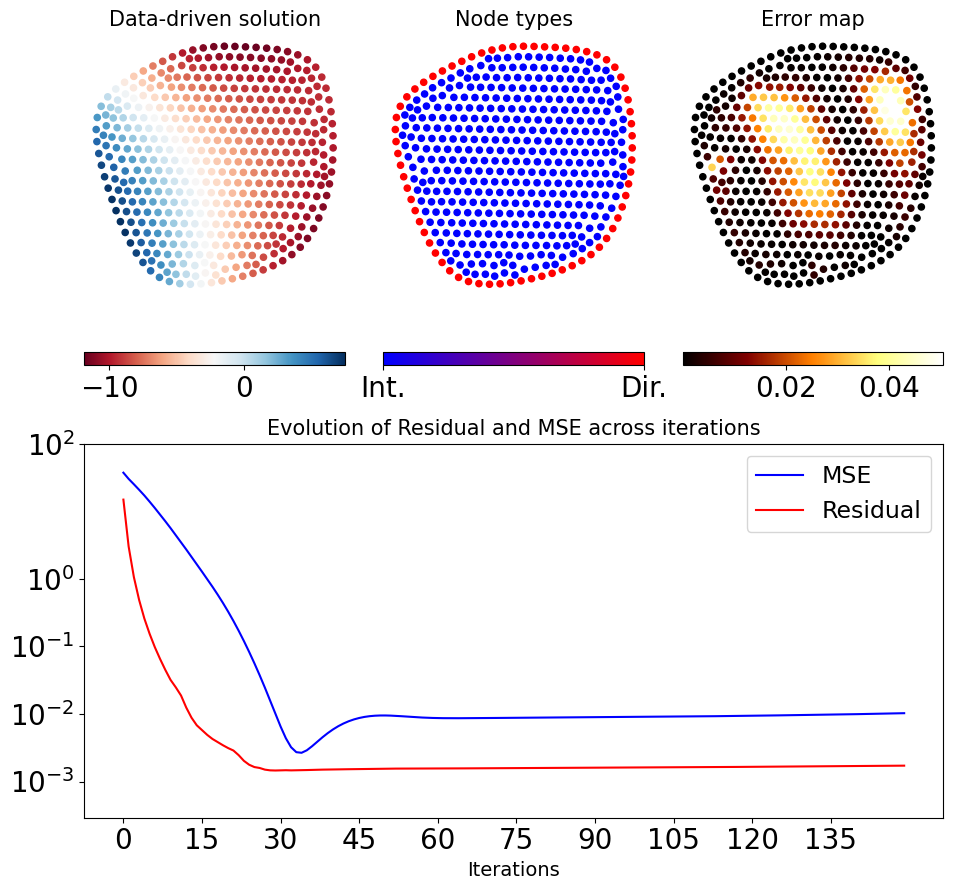

In [15]:
reload(vis)
reload(tst)

import time
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)

alea = np.random.randint(len(dataset_test))
print("Random sample : ", alea)

data = dataset_test[alea]
print(data)

tst.solution_sample(ckpt_best_large_iteration, data, device)

tst.solution_sample(ckpt_best_original_no_gamma, data, device)

tst.solution_sample(ckpt_best_original_with_gamma, data, device)

In [31]:
reload(tst)

tst.test_dataset(list_best_model, list_names, loader_test, device)

Evaluation model :  DS-GPS Original
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 0.9, 'path_logs': 'results/01_09_2023_11:06:58/logs'}


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:23<00:00,  1.74it/s]


Evaluation model :  DS-GPS Constant
Default config :  {'latent_dim': 10, 'k': 70, 'alpha': 0.001, 'gamma': 1.0, 'path_logs': 'results/01_09_2023_17:35:03/logs'}


100%|██████████| 40/40 [00:23<00:00,  1.72it/s]

std Res :  0.004896047102228086
std MSE :  0.06998683321531535
std Dirichlet :  0.00014902646111486365
┍━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━━━━━━┑
│ Name            │   Residual │       MSE │   MSEDirichlet │
┝━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━━━━━━┥
│ DS-GPS Original │  2.158e-03 │ 7.052e-02 │      1.210e-04 │
├─────────────────┼────────────┼───────────┼────────────────┤
│ DS-GPS Constant │  1.226e-02 │ 2.028e-01 │      4.810e-04 │
┕━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━━━━━━┙
